### Часть 1: Исследуем данные
Загрузим данные из файла Student_Behaviour.csv. Выведите первые 5 строк таблицы.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/V-Marco/public_intro_to_DS_mba_hse/main/HW/HW5/Student_Behaviour.csv')

In [ ]:
df.head()

,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,DailyStudingTime,PreferToStudyIn,SalaryExpectation,LikeDegree,CareerBasedonDegree,GamesSpendingTime,TravellingTime,StressLevel,FinancialStatus,PartTimeJob?
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


Проверьте колонки на наличие пропусков, избавьтесь их. 

Увидим, что пропуски в признаках отсутствуют, так как суммарно имеется по 235 записи.

In [ ]:
df.info()
# достаточно посмотреть на кол-во ненулевых значений в колонке к кол-ву строк в датафрейме, чтобы определить кол-во пропущенных значений в датасете.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CertificationCourses  235 non-null    object 
 1   Gender                235 non-null    object 
 2   Department            235 non-null    object 
 3   Height(CM)            235 non-null    float64
 4   Weight(KG)            235 non-null    float64
 5   10Mark                235 non-null    float64
 6   12Mark                235 non-null    float64
 7   CollegeMark           235 non-null    float64
 8   Hobbies               235 non-null    object 
 9   DailyStudingTime      235 non-null    object 
 10  PreferToStudyIn       235 non-null    object 
 11  SalaryExpectation     235 non-null    int64  
 12  LikeDegree            235 non-null    object 
 13  CareerBasedonDegree   235 non-null    object 
 14  GamesSpendingTime     235 non-null    object 
 15  TravellingTime        2

In [ ]:
# кол-во пропущенных значений в каждом столбце
display(df.isna().sum())
display(df.isna().sum().sum() / (len(df) * len(df.columns)))
# общий % пропущенных данных в датасете

CertificationCourses    0
Gender                  0
Department              0
Height(CM)              0
Weight(KG)              0
10Mark                  0
12Mark                  0
CollegeMark             0
Hobbies                 0
DailyStudingTime        0
PreferToStudyIn         0
SalaryExpectation       0
LikeDegree              0
CareerBasedonDegree     0
GamesSpendingTime       0
TravellingTime          0
StressLevel             0
FinancialStatus         0
PartTimeJob?            0
dtype: int64

0.0

In [ ]:
df.shape

(235, 19)

In [ ]:
# удаляем объекты, содержащие NaN'ы
# df = df.dropna()
# данном датасете нет пропущенных данных

In [ ]:
### пропущенные значения отсутствуют
print(df.isnull().sum().sum())

0


Колонку `CareerBasedonDegree` приведём к числовому виду.

In [ ]:
df.dtypes

CertificationCourses     object
Gender                   object
Department               object
Height(CM)              float64
Weight(KG)              float64
10Mark                  float64
12Mark                  float64
CollegeMark             float64
Hobbies                  object
DailyStudingTime         object
PreferToStudyIn          object
SalaryExpectation         int64
LikeDegree               object
CareerBasedonDegree      object
GamesSpendingTime        object
TravellingTime           object
StressLevel              object
FinancialStatus          object
PartTimeJob?             object
dtype: object

Интересующая нас колонка имеет тип данных 'object' - нам необходимо её перевести в числовой вид (int8)

In [ ]:
# посмотрим на кол-во значений в данной колонке
df["CareerBasedonDegree"].value_counts()

75%     114
50%      61
100%     44
25%      14
0%        2
Name: CareerBasedonDegree, dtype: int64

In [ ]:
# поменяем тип данных
df["CareerBasedonDegree"] = df["CareerBasedonDegree"].astype('category')

In [ ]:
df["CareerBasedonDegree"] = df["CareerBasedonDegree"].cat.codes
# помощь - https://dfedorov.spb.ru/pandas/Руководство%20по%20кодированию%20категориальных%20значений%20в%20Python.html

In [ ]:
df.head()

,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,DailyStudingTime,PreferToStudyIn,SalaryExpectation,LikeDegree,CareerBasedonDegree,GamesSpendingTime,TravellingTime,StressLevel,FinancialStatus,PartTimeJob?
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,3,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,4,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,3,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,3,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,2,1.30 - 2 hour,30 - 60 minutes,Good,good,No


In [ ]:
# видим, что тип данных поменялся на 'int8'
df.dtypes

CertificationCourses     object
Gender                   object
Department               object
Height(CM)              float64
Weight(KG)              float64
10Mark                  float64
12Mark                  float64
CollegeMark             float64
Hobbies                  object
DailyStudingTime         object
PreferToStudyIn          object
SalaryExpectation         int64
LikeDegree               object
CareerBasedonDegree        int8
GamesSpendingTime        object
TravellingTime           object
StressLevel              object
FinancialStatus          object
PartTimeJob?             object
dtype: object

В датасете есть 3 поля, с суффиксом `Time`, данные в них строковые, которые означают временной интервал. Извлеките минимальное время(левую границу интервала) для каждой из этих переменных и переведите в минуты, запишите в новые столбцы, удалите старые.

In [ ]:
# помощь - https://elearning.wsldp.com/python3/python-check-string-is-a-number/
def is_number(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

In [ ]:
def convert_to_minutes(df):
    x = df
    y = []
    for i in x:
        temp = min([float(s) for s in i.split() if is_number(s)])
        if "hour" in i or "Hour" in i:
            temp *= 60
        y.append(int(temp))
    return y

In [ ]:
df_temp = pd.DataFrame()

df_temp['DailyStudingTime'] = df['DailyStudingTime']
df_temp['GamesSpendingTime'] = df['GamesSpendingTime']
df_temp['TravellingTime '] = df['TravellingTime ']

In [ ]:
df_temp.head()

,DailyStudingTime,GamesSpendingTime,TravellingTime
0,0 - 30 minute,1.30 - 2 hour,30 - 60 minutes
1,30 - 60 minute,1 - 1.30 hour,0 - 30 minutes
2,1 - 2 Hour,More than 2 hour,30 - 60 minutes
3,1 - 2 Hour,1.30 - 2 hour,0 - 30 minutes
4,30 - 60 minute,1.30 - 2 hour,30 - 60 minutes


In [ ]:
# трансформируем содержащееся колонок в минуты
df_temp['DailyStudingTime'] = convert_to_minutes(df_temp['DailyStudingTime'])
df_temp['GamesSpendingTime'] = convert_to_minutes(df_temp['GamesSpendingTime'])
df_temp['TravellingTime '] = convert_to_minutes(df_temp['TravellingTime '])

In [ ]:
df['DailyStudingTime'] = df_temp['DailyStudingTime']
df['GamesSpendingTime'] = df_temp['GamesSpendingTime']
df['TravellingTime '] = df_temp['TravellingTime ']

In [ ]:
df['DailyStudingTime'].head()

0     0
1    30
2    60
3    60
4    30
Name: DailyStudingTime, dtype: int64

In [ ]:
df['GamesSpendingTime'].head()

0     78
1     60
2    120
3     78
4     78
Name: GamesSpendingTime, dtype: int64

In [ ]:
df['TravellingTime '].head()

0    30
1     0
2    30
3     0
4    30
Name: TravellingTime , dtype: int64

Выберем колонки (непрерывные переменные), которые будем использовать для предсказания целевой переменной с помощью knn

In [ ]:
df.columns

Index(['CertificationCourses', 'Gender', 'Department', 'Height(CM)',
       'Weight(KG)', '10Mark', '12Mark', 'CollegeMark', 'Hobbies',
       'DailyStudingTime', 'PreferToStudyIn', 'SalaryExpectation',
       'LikeDegree', 'CareerBasedonDegree', 'GamesSpendingTime',
       'TravellingTime ', 'StressLevel ', 'FinancialStatus', 'PartTimeJob?'],
      dtype='object')

Возьмём continuos переменные:

In [ ]:
df.nunique()

CertificationCourses     2
Gender                   2
Department               4
Height(CM)              56
Weight(KG)              52
10Mark                  68
12Mark                  67
CollegeMark             43
Hobbies                  4
DailyStudingTime         6
PreferToStudyIn          3
SalaryExpectation       34
LikeDegree               2
CareerBasedonDegree      5
GamesSpendingTime        6
TravellingTime           7
StressLevel              4
FinancialStatus          4
PartTimeJob?             2
dtype: int64

In [ ]:
# колонки (непрерывные переменные), которые будем использовать для предсказания целевой переменной с помощью KNN
numerical_cols = [
            'Height(CM)',
            'Weight(KG)', 
            '10Mark', 
            '12Mark', 
            'CollegeMark',
            'DailyStudingTime',
            'SalaryExpectation',
            'CareerBasedonDegree',
            'GamesSpendingTime',
            'TravellingTime ',
]

Есть ли в выбранных колонках выбросы? (Пока не нужно их чистить)

Да, выбросы несомненно имеются, куда уж без них...

Визулизируем лишь те непрерывные переменные, в которых имеются выбросы и наглядно это покажем для общего понимания картины:

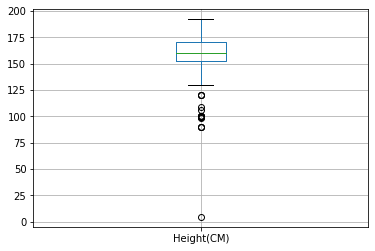

In [ ]:
# коробчатая диаграмма
df.boxplot(column = ['Height(CM)'])

Видим некотоые выбросы со значением меньше 125см в колонке 'Height(CM)', вероятно это дети 🚸🧒 или карлики, хотя датасет состоит из студентов :)

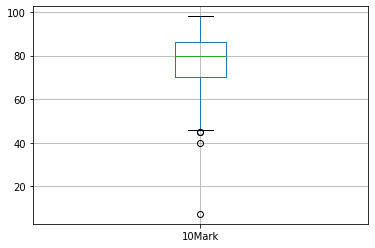

In [ ]:
df.boxplot(column = ['10Mark'])

Заметим небольшие выбросы со значением ниже 50 в колонке '10Mark'

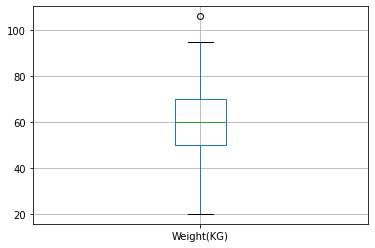

In [ ]:
df.boxplot(column = ['Weight(KG)'])

Есть один выброс со значением выше 100kg в колонке 'Weight(KG)', действительно не все люди кабаны и весят по 100кг, такое бывает - вкусно и точка 😋:)

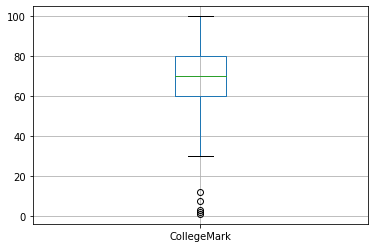

In [ ]:
df.boxplot(column = ['CollegeMark'])

Есть некоторые выбросы со значением ниже 20 в колонке 'CollegeMark', вероятно двоечники-тиктокеры 😆🤝

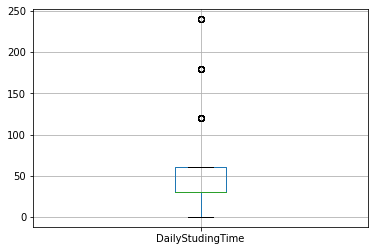

In [ ]:
df.boxplot(column = ['DailyStudingTime'])

Есть парочка выбросов со значением времени более 100 в колонке 'DailyStudingTime', настоящие работяги 💪

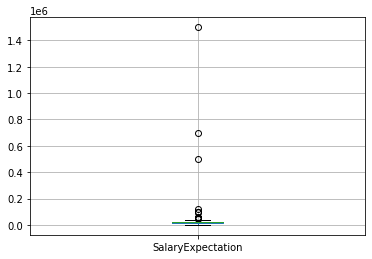

In [ ]:
df.boxplot(column = ['SalaryExpectation'])

Есть некотоые выбросы в колонке 'SalaryExpectation' со значением между 0.4 и 0.8, а также явный аутлайер со значением более 1.4 🤑💸

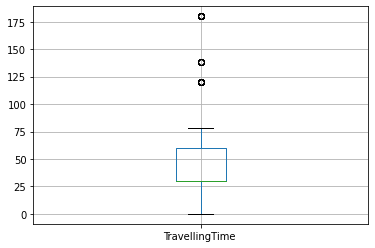

In [ ]:
df.boxplot(column = ['TravellingTime '])

Есть некоторые выбросы со значением выше 120 в колонке 'TravellingTime ', настоящие путешественники-тревел блоггеры ⛺

Как распределена целевая переменная? Нет ли дисбаланса классов? Если есть дисбаланс, какие метрики качества классификатора можно использовать, какие нет? Рассматриваем метрики, которые проходили в рамках курса.

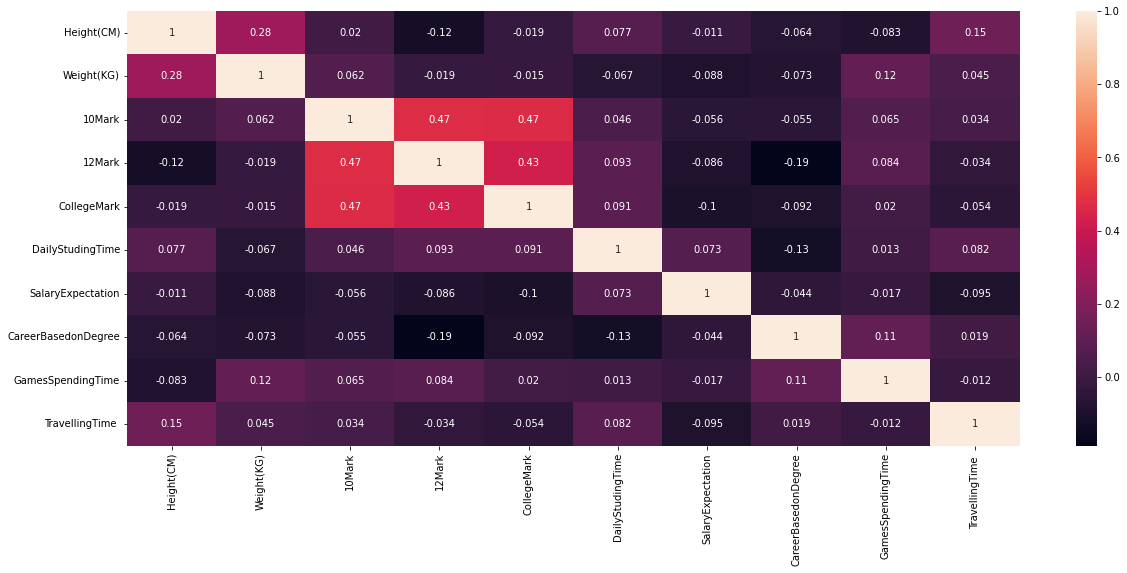

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 8))

sns.heatmap(df.corr(), annot = True);

Переведём целевую переменную к численному формату.

In [ ]:
target_col = ['LikeDegree']

In [ ]:
df['LikeDegree'] = df['LikeDegree'].apply(lambda x: 1 if x == "Yes" else 0)
df['LikeDegree'].head()

0    0
1    1
2    1
3    0
4    1
Name: LikeDegree, dtype: int64

Рассмотрим распределение целевой переменной 'LikeDegree':

In [ ]:
df[target_col].value_counts()

LikeDegree
1             215
0              20
dtype: int64

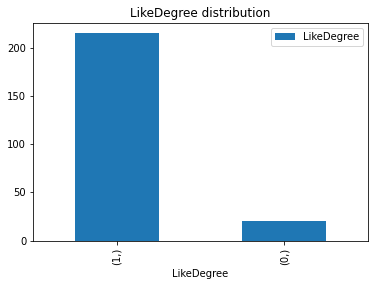

In [ ]:
df[target_col].value_counts().plot(kind = 'bar', label = 'LikeDegree')

plt.legend()
plt.title('LikeDegree distribution');

### Часть 2: Строим модели
Разобьём выборку на обучающую и тестовую. 

In [ ]:
X = df[numerical_cols]
y = df[target_col]

80% for training, 20% for testing.

In [ ]:
from sklearn.model_selection import train_test_split
# разбиваем выборку                      
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Построим наивную модель предсказания для целевой переменной. 

Наивная модель - это самая простая модель, без сложных зависимостей. Например, для регрессии наивная модель - среднее для целевой переменной. В данном случае наивной моделью может быть предположение "все студенты (не)довольны".

In [ ]:
y_naive = np.zeros(len(y_test))

Построим модели ближайших соседей для 3, 5, 7 ближайших соседей. 

#### Модель ближайших соседей для 3 ближайших соседей:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_3 = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
y_pred_3 = model_3.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.93      0.98      0.96        44

    accuracy                           0.91        47
   macro avg       0.47      0.49      0.48        47
weighted avg       0.88      0.91      0.89        47



In [ ]:
p_pred_knn = model_3.predict_proba(X_test) 
p_pred_knn = p_pred_knn[:, 1]

In [ ]:
p_pred_knn

array([0.66666667, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.66666667, 1.        , 1.        , 0.33333333,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       1.        , 1.        , 0.66666667, 0.66666667, 1.        ,
       1.        , 1.        , 0.66666667, 0.66666667, 1.        ,
       0.66666667, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.66666667, 0.66666667, 1.        ,
       0.66666667, 1.        , 1.        , 0.66666667, 1.        ,
       1.        , 0.66666667])

#### Модель ближайших соседей для 5 ближайших соседей:

In [ ]:
model_5 = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
y_pred_5 = model_5.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print(classification_report(y_test, y_pred_5))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.94      1.00      0.97        44

    accuracy                           0.94        47
   macro avg       0.47      0.50      0.48        47
weighted avg       0.88      0.94      0.91        47



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
p_pred_knn = model_5.predict_proba(X_test) 
p_pred_knn = p_pred_knn[:, 1]

In [ ]:
p_pred_knn

array([0.8, 1. , 0.8, 1. , 1. , 1. , 0.8, 1. , 1. , 0.6, 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 0.8, 1. , 1. , 0.8, 0.8, 0.8, 1. , 1. ,
       0.8, 0.8, 0.8, 1. , 0.8, 1. , 0.8, 1. , 1. , 1. , 1. , 0.8, 0.8,
       1. , 0.8, 0.6, 1. , 0.8, 1. , 1. , 0.8])

#### Модель ближайших соседей для 7 ближайших соседей:

In [ ]:
model_7 = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
y_pred_7 = model_7.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print(classification_report(y_test, y_pred_7))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.94      1.00      0.97        44

    accuracy                           0.94        47
   macro avg       0.47      0.50      0.48        47
weighted avg       0.88      0.94      0.91        47



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
p_pred_knn = model_7.predict_proba(X_test) 
p_pred_knn = p_pred_knn[:, 1]

In [ ]:
p_pred_knn

array([0.71428571, 0.85714286, 0.85714286, 1.        , 1.        ,
       1.        , 0.85714286, 0.85714286, 1.        , 0.71428571,
       0.85714286, 1.        , 0.85714286, 1.        , 0.85714286,
       1.        , 1.        , 1.        , 0.71428571, 1.        ,
       1.        , 0.85714286, 0.85714286, 0.71428571, 1.        ,
       0.85714286, 0.85714286, 0.85714286, 0.85714286, 1.        ,
       0.85714286, 1.        , 0.85714286, 1.        , 1.        ,
       1.        , 1.        , 0.85714286, 0.71428571, 1.        ,
       0.85714286, 0.71428571, 1.        , 0.71428571, 1.        ,
       1.        , 0.85714286])

Постройте метрики качества на тестовой выборке (3 известных вам) для моделей из 1 и 2 задания и сравните между собой. Какая победила? 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Naive -" , " Accuracy: " , accuracy_score(y_test, y_naive) , " Precision: " , precision_score(y_test, y_naive) , 
      " Recall: " , recall_score(y_test, y_naive))

Naive -  Accuracy:  0.06382978723404255  Precision:  0.0  Recall:  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("KNN 3 -" , " Accuracy: " , accuracy_score(y_test, y_pred_3) , " Precision: " , precision_score(y_test, y_pred_3) , 
      " Recall: " , recall_score(y_test, y_pred_3))
print("KNN 5 -" , " Accuracy: " , accuracy_score(y_test, y_pred_5) , " Precision: " , precision_score(y_test, y_pred_5) , 
      " Recall: " , recall_score(y_test, y_pred_5))
print("KNN 7 -" , " Accuracy: " , accuracy_score(y_test, y_pred_7) , " Precision: " , precision_score(y_test, y_pred_7) , 
      " Recall: " , recall_score(y_test, y_pred_7))

KNN 3 -  Accuracy:  0.9148936170212766  Precision:  0.9347826086956522  Recall:  0.9772727272727273
KNN 5 -  Accuracy:  0.9361702127659575  Precision:  0.9361702127659575  Recall:  1.0
KNN 7 -  Accuracy:  0.9361702127659575  Precision:  0.9361702127659575  Recall:  1.0


Заметим, что accuracy KNN модели (для 3, 5 и 7 соседей) гораздо выше 💪 наивной модели, поэтому **метод KNN - ближайших соседей победил** 😉 в данном противостоянии.

Применим шкалирование (MinMax, обучите его на обучающей выборке к факторам, затем примените к тестовой), снова построим модели для нескольких вариантов соседей (3, 5, 7). Помогло ли шкалирование? 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)

In [ ]:
X_train_norm = scaler.transform(X_train) 
X_test_norm = scaler.transform(X_test)

In [ ]:
model_3_norm = KNeighborsClassifier(n_neighbors = 3).fit(X_train_norm, y_train)
y_pred_knn_3_norm = model_3_norm.predict(X_test_norm)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print("KNN 3 -" , " Accuracy: " , accuracy_score(y_test, y_pred_knn_3_norm) , " Precision: " , precision_score(y_test, y_pred_knn_3_norm) , 
      " Recall: " , recall_score(y_test, y_pred_knn_3_norm))

KNN 3 -  Accuracy:  0.8936170212765957  Precision:  0.9333333333333333  Recall:  0.9545454545454546


Шкалирование для 3 ближайших соседей не сыграло роли 😲, а наоборот ухудшило точность модели 😞 => не стоит его использовать в данной задаче.

In [ ]:
model_5_norm = KNeighborsClassifier(n_neighbors = 5).fit(X_train_norm, y_train)
y_pred_knn_5_norm = model_5_norm.predict(X_test_norm)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print("KNN 5 -" , " Accuracy: " , accuracy_score(y_test, y_pred_knn_5_norm) , " Precision: " , precision_score(y_test, y_pred_knn_5_norm) , 
      " Recall: " , recall_score(y_test, y_pred_knn_5_norm))

KNN 5 -  Accuracy:  0.9361702127659575  Precision:  0.9361702127659575  Recall:  1.0


In [ ]:
model_7_norm = KNeighborsClassifier(n_neighbors = 7).fit(X_train_norm, y_train)
y_pred_knn_7_norm = model_7_norm.predict(X_test_norm)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print("KNN 7 -" , " Accuracy: " , accuracy_score(y_test, y_pred_knn_7_norm) , " Precision: " , precision_score(y_test, y_pred_knn_7_norm) , 
      " Recall: " , recall_score(y_test, y_pred_knn_7_norm))

KNN 7 -  Accuracy:  0.9361702127659575  Precision:  0.9361702127659575  Recall:  1.0


Избавьтесь от выбросов в исходной выборке, затем снова разделите ее на тестовую и обучающую, постройте модель для нескольких вариантов числа соседей(3, 5, 7). Какое число соседей лучшее и почему? Улучшилось ли качество модели по сравнению со лучшей моделью, в которой было применено шкалирование из задания 5?

In [ ]:
X.apply(lambda w: np.log(w + 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
model_3 = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
y_pred_knn_3 = model_3.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print("KNN 3 -" , " Accuracy: " , accuracy_score(y_test, y_pred_knn_3) , " Precision: " , precision_score(y_test, y_pred_knn_3) , 
      " Recall: " , recall_score(y_test, y_pred_knn_3))

KNN 3 -  Accuracy:  0.9148936170212766  Precision:  0.9347826086956522  Recall:  0.9772727272727273


In [ ]:
model_5 = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
y_pred_knn_5 = model_5.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print("KNN 5 -" , " Accuracy: " , accuracy_score(y_test, y_pred_knn_5) , " Precision: " , precision_score(y_test, y_pred_knn_5) , 
      " Recall: " , recall_score(y_test, y_pred_knn_5))

KNN 5 -  Accuracy:  0.9361702127659575  Precision:  0.9361702127659575  Recall:  1.0


In [ ]:
model_7 = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
y_pred_knn_7 = model_7.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print("KNN 7 -" , " Accuracy: " , accuracy_score(y_test, y_pred_knn_7) , " Precision: " , precision_score(y_test, y_pred_knn_7) , 
      " Recall: " , recall_score(y_test, y_pred_knn_7))

KNN 7 -  Accuracy:  0.9361702127659575  Precision:  0.9361702127659575  Recall:  1.0


Какая конфигурация модели получилась лучшей? Почему? Выбираем из всех построенных моделей, не забудьте про наивный прогноз и все рассмотренне варианты числа соседей. 

Вывод: можно принебречь использованием шкалирования ✋, оно привело к ухудшению 😞 метрики качества нашей модели как и наивный байес 👎 в принципе. 

- Шкалирование применется совместно с уменьшением размерности - PCA. 
- Применяется шкалирование и с использованием методов, основанных на подсчёте расстояний (K-means) + градиентный спуск. 

Говоря о **результатах**: *Модели с кол-вом соседей 5 и 7* проявили себя лучше всего 🤲 на всех проделанных экспериментах 🔮, ссылаясь на их **точность**